# Clustering

## Kmeans

Usaremos agrupamento por K-means por causa de suas várias vantagens. 

Em primeiro lugar, é um dos métodos de aprendizagem não supervisionados mais populares e tem sido muito pesquisado, então você pode encontrar respostas e dicas para quase todas as perguntas a respeito. 

Além disso, é um algoritmo muito rápido em comparação com os mais lentos que não funcionam muito bem com grandes conjuntos de dados - especialmente em sua máquina local. E, finalmente, ele faz seu trabalho bem, contanto que suas suposições sobre os dados estejam corretas. Iremos revisá-los nesta lição e, em seguida, aprender como pré-processar seus dados para obter o máximo do k-means.

Existem algumas suposições que são absolutamente essenciais para abordar antes do agrupamento. 

A primeira suposição é que todas as variáveis têm distribuições simétricas. Por definição, isso significa que a distribuição não é distorcida (skewed). 

A segunda suposição é que todas as variáveis têm os mesmos valores médios. Essa é a chave para garantir que cada métrica tenha um peso igual no cálculo de k-médias. Você aprenderá como fazer com que todas as variáveis tenham a mesma média. 

Por ultimo, dimensionar a variância de cada variável para os mesmos níveis. Da mesma forma que as médias, ajuda o algoritmo a convergir e garante que igual importância seja atribuída a cada variável.

K-means assume que cada variável tem valor médio igual e variância igual. Usaremos valores recentes, de frequência e monetários para o agrupamento e, na próxima lição, você verá que eles não atendem a nenhum dos critérios.

## Data pre-processing

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('darkgrid')

In [2]:
datamart = pd.read_csv('rfm_datamart.csv')
datamart.head()

,CustomerID,Recency,Frequency,MonetaryValue
0,12747,3,25,948.70
1,12748,1,888,7046.16
2,12749,4,37,813.45
3,12820,4,17,268.02
4,12822,71,9,146.15


C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


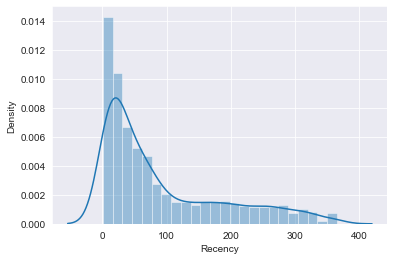

In [13]:
# Managing skewed variables

sns.distplot(datamart.Recency)
plt.show()

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


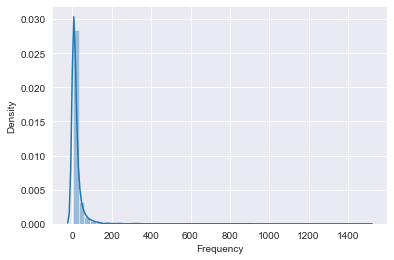

In [12]:
sns.distplot(datamart.Frequency)
plt.show()

A maneira mais fácil de remover a distorção dos dados é aplicando uma transformação logarítmica, mas isso só funciona em valores positivos.

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


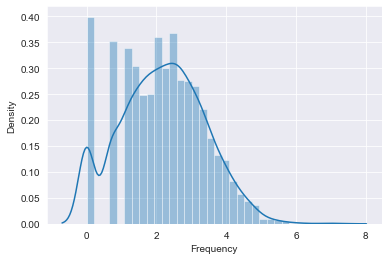

In [11]:
frequency_log = np.log(datamart['Frequency'])
sns.distplot(frequency_log)
plt.show()

## Centering and scaling data

In [14]:
datamart.describe()

,CustomerID,Recency,Frequency,MonetaryValue
count,3643.000000,3643.00000,3643.000000,3643.000000
mean,15551.620642,90.43563,18.714247,370.694387
std,1562.587958,94.44651,43.754468,1347.443451
min,12747.000000,1.00000,1.000000,0.650000
25%,14209.500000,19.00000,4.000000,58.705000
50%,15557.000000,51.00000,9.000000,136.370000
75%,16890.000000,139.00000,21.000000,334.350000
max,18287.000000,365.00000,1497.000000,48060.350000


Podemos ver imediatamente que cada uma de nossas três variáveis tem um valor médio diferente e um desvio padrão diferente. Dado que k-means funciona bem em variáveis com os mesmos valores médios, teremos que centralizá-los. Centralizar variáveis é um procedimento simples que é feito calculando uma média para cada variável e, em seguida, subtraindo-a de cada observação.

In [16]:
datamart_centered = datamart - datamart.mean()
datamart_centered.describe().round(2)

,CustomerID,Recency,Frequency,MonetaryValue
count,3643.00,3643.00,3643.00,3643.00
mean,0.00,0.00,-0.00,0.00
std,1562.59,94.45,43.75,1347.44
min,-2804.62,-89.44,-17.71,-370.04
25%,-1342.12,-71.44,-14.71,-311.99
50%,5.38,-39.44,-9.71,-234.32
75%,1338.38,48.56,2.29,-36.34
max,2735.38,274.56,1478.29,47689.66


Os valores médios agora estão muito próximos de zero para todas as três variáveis.

O Kmeans funciona melhor em variáveis não apenas com os mesmos valores médios, mas com a mesma variância. O mecanismo para dimensionar as variáveis para a mesma variância é tão simples quanto centralizar, dividindo cada observação pelo desvio padrão de cada variável.

In [23]:
datamart_scaled = datamart_centered / datamart_centered.std()
datamart_scaled.describe().round(2)

,CustomerID,Recency,Frequency,MonetaryValue
count,3643.00,3643.00,3643.00,3643.00
mean,-0.00,-0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00
min,-1.79,-0.95,-0.40,-0.27
25%,-0.86,-0.76,-0.34,-0.23
50%,0.00,-0.42,-0.22,-0.17
75%,0.86,0.51,0.05,-0.03
max,1.75,2.91,33.79,35.39


In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
scaler = StandardScaler()
scaler.fit(datamart)

datamart_normalized = scaler.transform(datamart)

In [22]:
print('mean: ',datamart_normalized.mean(axis=0).round(2))
print('std: ',datamart_normalized.std(axis=0).round(2))

mean:  [-0. -0. -0.  0.]
std:  [1. 1. 1. 1.]


## Pre-processing pipeline


In [24]:
# Unskew the data
datamart_log = np.log(datamart)

In [25]:
scaler = StandardScaler()
scaler.fit(datamart_log)

datamart_normalized = scaler.transform(datamart_log)

In [27]:
datamart_normalized = pd.DataFrame(data=datamart_normalized, index=datamart.index, columns=datamart.columns)
datamart_normalized

,CustomerID,Recency,Frequency,MonetaryValue
0,-1.914291,-2.002202,0.865157,1.464940
1,-1.913516,-2.814518,3.815272,2.994692
2,-1.912742,-1.789490,1.189117,1.347598
3,-1.857877,-1.789490,0.546468,0.500595
4,-1.856336,0.337315,0.020925,0.037943
...,...,...,...,...
3638,1.647212,1.346554,-1.221955,-0.975812
3639,1.647753,1.029259,-1.221955,-1.125628
3640,1.648293,-1.276975,-1.221955,-1.152485
3641,1.648833,-1.789490,2.356706,0.866422
